In [64]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib widget

# Calculus
## Differentiation
    from scipy.misc import derivative

In [54]:
from scipy.misc import derivative
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0,1,100)
#sp.misc.derivative(f,x,dx=1e-6)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
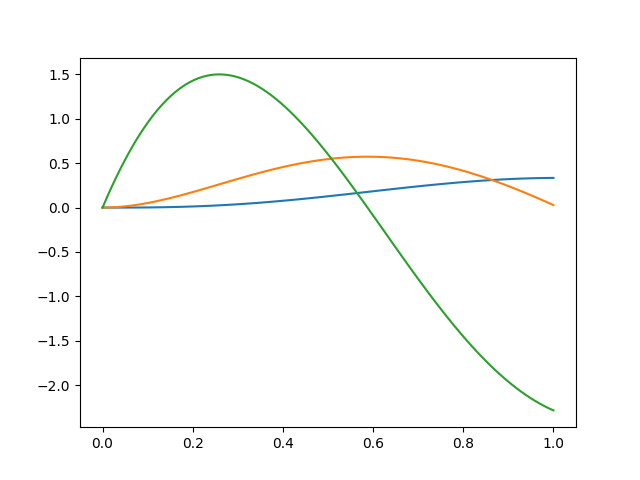

In [65]:
plt.plot(x,f(x))
plt.plot(x,derivative(f,x,dx=1e-6))
plt.plot(x,derivative(f,x,dx=1e-6,n=2))

In [66]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral1, integral_error = quad(integrand,0,1)
integral_error

1.1376208786903388e-15

# double quad
$$ \int_0^1\,\int_{-x}^{x^2} \sin(x+y^2)dydx$$

In [68]:
from scipy.integrate import dblquad
integrand = lambda x,y: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand,0,1,lwr_y,upr_y)

In [69]:
integral

0.315802507240474

# Differential Equation
## First Order ODEs
- Air friction while falling
$$ v' - \alpha v^2 + \beta \quad v(0) = 0 $$

In [70]:
from scipy.integrate import odeint

In [71]:
def dvdt(v,t):
    return 3*v**2 - 5
v0 = 0

In [72]:
t = np.linspace(0,1,100)
sol = odeint(dvdt, v0, t)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
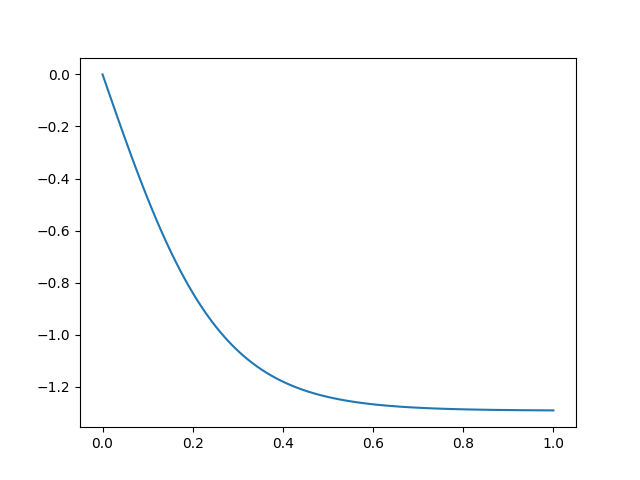

In [76]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(t,sol.T[0])

# Coupled first order ODEs
$$ y'_1 = y_1 + y_2^2 + 3x \quad y_1(0) = 0 \\
   y'_2 = 3y_1 + y_2^2 - \cos(x) \quad y_2(0) = 0
$$ 

In [77]:
def dSdx(S,x):
    y1,y2 = S
    return [ y1 + y2**2 + 3*x, 3*y1 + y2**3 * np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [78]:
x = np.linspace(0,1,100)
sol = odeint(dSdx, S_0,x)

In [79]:
sol

array([[0.00000000e+00, 0.00000000e+00],
       [1.53567242e-04, 1.56489031e-06],
       [6.16330852e-04, 1.24452503e-05],
       [1.39143490e-03, 4.20732408e-05],
       [2.48205041e-03, 9.99617864e-05],
       [3.89138058e-03, 1.95720152e-04],
       [5.62266137e-03, 3.39055153e-04],
       [7.67916215e-03, 5.39772431e-04],
       [1.00641859e-02, 8.07777203e-04],
       [1.27810704e-02, 1.15307520e-03],
       [1.58331891e-02, 1.58577381e-03],
       [1.92239513e-02, 2.11608320e-03],
       [2.29568053e-02, 2.75431758e-03],
       [2.70352376e-02, 3.51089607e-03],
       [3.14627762e-02, 4.39634425e-03],
       [3.62429928e-02, 5.42129548e-03],
       [4.13795027e-02, 6.59649183e-03],
       [4.68759712e-02, 7.93278638e-03],
       [5.27361138e-02, 9.44114415e-03],
       [5.89636993e-02, 1.11326439e-02],
       [6.55625579e-02, 1.30184810e-02],
       [7.25365796e-02, 1.51099682e-02],
       [7.98897204e-02, 1.74185378e-02],
       [8.76260125e-02, 1.99557468e-02],
       [9.574956